In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
class PCF(object):
    def __init__(self, data_size):
        self.N = data_size
        
        # 学習データを生成
        self.x_train = np.linspace(0, 1, self.N)
        self.t_train = np.array([np.sin(x) for x in np.linspace(0, 2 * np.pi, self.N)])  + (np.random.rand(self.N) - 0.5)
        
        # 生成した学習データを表示
        plt.plot(self.x_train, self.t_train, 'o')
        plt.show()
    
    def predicts(self, M_list):
        # ノイズのないsin波を生成
        x_real = np.arange(0, 1, 0.01)
        y_real = np.sin(2 * np.pi * x_real)
        
        for M in M_list:
            A_list = self._A(M)
            T_list = self._T(M)
            W_list = np.linalg.solve(A_list, T_list)

            y_prediction = self._predict(x_real, W_list, M)
            
            # 描画
            plt.title("M=" + str(M))
            plt.plot(x_real, y_real)
            plt.plot(x_real, y_prediction, 'r')
            plt.plot(self.x_train, self.t_train, 'bo')
            plt.show()
    
    def _A(self, M):
        return np.array([[(self.x_train ** (i + j)).sum() for j in range(M + 1)] for i in range(M + 1)])

    def _T(self, M):
        return np.array([(self.t_train * self.x_train ** i).sum() for i in range(M + 1)])

    def _predict(self, x_real, w, M):
        return np.array([sum([w[i] * x ** i for i in range(M + 1)]) for x in x_real])
    
    

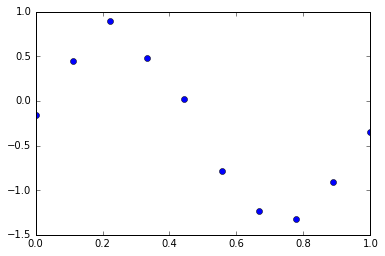

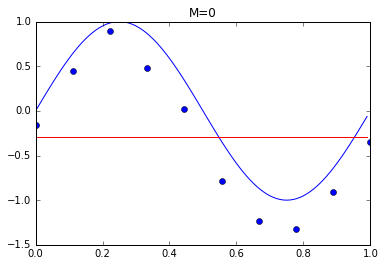

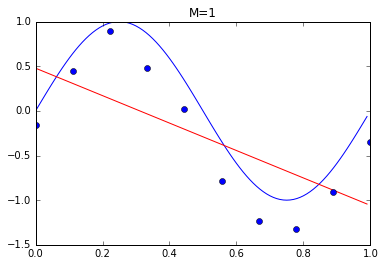

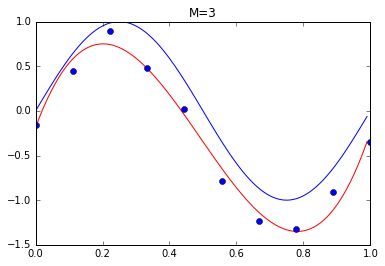

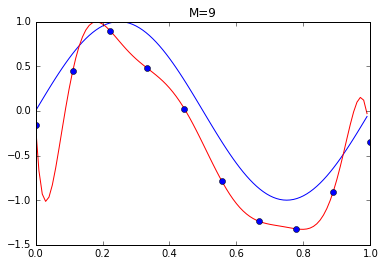

In [3]:
# 学習データ数が10の場合
model = PCF(data_size=10)
model.predicts(M_list=[0, 1, 3, 9])

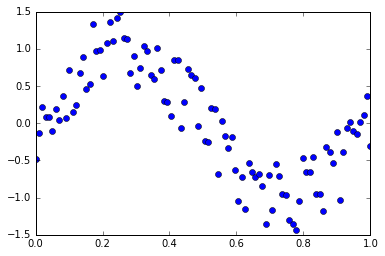

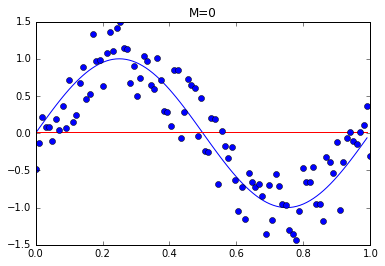

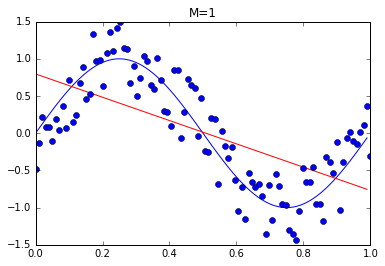

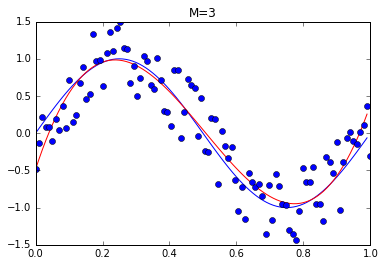

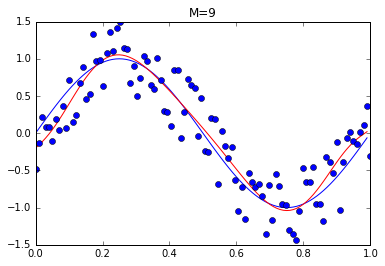

In [4]:
# 学習データ数が100の場合
model = PCF(data_size=100)
model.predicts(M_list=[0, 1, 3, 9])